In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
num_samples = 40
sine_scale = 0.5 # The number of sine waves

x = np.linspace(-1, 1, num_samples)
y = np.sin(x * sine_scale * np.pi)
x_smooth = np.linspace(-1, 1, 1000)
y_smooth = np.sin(x_smooth * sine_scale * np.pi)

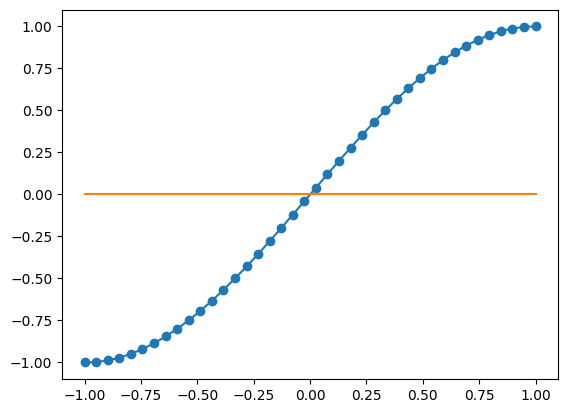

In [129]:

def plot_graph(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients[::-1])
    p_smooth = polynomial(x_smooth)
    
    plt.plot(x_smooth, y_smooth)
    plt.plot(x_smooth, p_smooth)
    plt.scatter(x, y)
    plt.show()

degree = 3
polynomial_coefficients = np.zeros(degree + 1)
plot_graph(polynomial_coefficients)

In [130]:
def mse(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients[::-1])
    p = polynomial(x)
    e = p - y
    return 1/(2*num_samples) * np.sum(e**2)

print(mse(polynomial_coefficients))

0.25625000000000003


In [131]:
X = np.vstack([x**i for i in range(degree + 1)]).T

def gradient(polynomial_coefficients):
    py = X @ polynomial_coefficients
    e = py - y
    gradient = (1/num_samples) * X.T @ e
    return gradient

print(gradient(polynomial_coefficients))


[ 4.68375339e-17 -4.20366361e-01  2.77555756e-17 -2.50203087e-01]


Step: ['4.68e-19', '-0.0042', '2.78e-19', '-0.0025']
New coefficients: ['-4.68e-19', '0.0042', '-2.78e-19', '0.0025']
New MSE: 0.25386284266074216


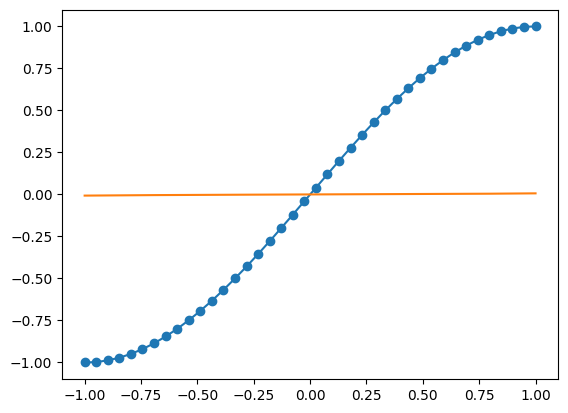

In [132]:
# Make a copy so I don't mess up original
coefficients = polynomial_coefficients.copy()

learning_rate = 0.01

step = learning_rate * gradient(coefficients)
print(f"Step: {[f'{x:.3g}' for x in step]}")

coefficients -= learning_rate * gradient(coefficients)
print(f"New coefficients: {[f'{x:.3g}' for x in coefficients]}")

print(f"New MSE: {mse(coefficients)}")
plot_graph(coefficients)
